**problem 1 : IMDB Voted**  

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the most voted movie in IMDB Movie Database.
Print the movie name and the rating of that movie.

In [1]:
import pandas as pd 
import sqlite3 as s 
db = s.connect("IMDB.sqlite")
data = pd.read_sql_query("select Title , Rating from IMDB",db)


In [17]:
data = data[data.Rating == max(data.Rating)]
# print(data["Title"].values[0],data["Rating"].values[0])
print(*data.values[0])

Inception (2010) 8.8


**Problem 2 : IMDB running time**  

IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the Movie with Longest-Running Time from IMDB Movie database.
Print the name of movie and running time as integer value.

In [66]:
import pandas as pd 
import sqlite3 as s 
import numpy as np
db = s.connect("IMDB.sqlite")
data = pd.read_sql_query("select Title , Runtime from IMDB",db)

In [67]:
def value (Input_time):
    return Input_time.strip().split(" ")[0]

data["Runtime"] = data["Runtime"].apply(value)
data ["Runtime"].replace("",np.nan,inplace=True)
data["Runtime"].astype(float)

### droping the NAN values into the Runtime column 
data.dropna(inplace= True, subset=["Runtime"])
data["Runtime"] = data["Runtime"].astype(int)
data = data[data.Runtime == max(data.Runtime)]
print(*data.values[0])

The Wolf of Wall Street (2013) 180


**Problem 3 : IMDB profit**  
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the movie which has maximum net profit in IMDB Movie Database.
Print the movie name.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [68]:
import pandas as pd 
import sqlite3 as s 
import numpy as np
db = s.connect("IMDB.sqlite")
data = pd.read_sql_query("select Title , Domestic,Worldwide,Budget from earning join IMDB on earning.Movie_id = IMDB.Movie_id ",db)

In [69]:
data["Total"] = data["Domestic"]+data["Worldwide"]
data["Budget"].replace("",np.nan,inplace=True)
data["Budget"].astype(float)
data["Profit"] = data["Total"]-data["Budget"]
data = data[data.Profit == max(data.Profit)]
print(data.values[0][0])


Star Wars: The Force Awakens (2015)


**Problem 4 : IMDB least budget** 

IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the least budgeted movie in IMDB Movie Database.
If there is more than one least budgeted movies then print the movie which has maximum net profit.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [73]:
import pandas as pd 
import sqlite3 as s 
import numpy as np
db = s.connect("IMDB.sqlite")
# data = pd.read_sql_query("select Title , Domestic,Worldwide,Budget from earning join IMDB on earning.Movie_id = IMDB.Movie_id ",db)
data = pd.read_sql_query("select Title , Domestic,Worldwide,Budget from earning join IMDB using(Movie_id) ",db)
##both the query is same USING is use when the both table having same column name

In [75]:
data["Total"] = data["Domestic"]+data["Worldwide"]
data["Budget"].replace("",np.nan,inplace=True)
# data["Budget"].astype(float)
data["Profit"] = data.Total - data.Budget

data = data[data.Budget == min(data.Budget)]
data = data[data.Profit == max(data.Profit)]
print(data.values[0][0])

Short Term 12 (2013)


**Problem 5 : IMDB Year Top**  

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.
Print the Year and name of the movie which was the highest grosser in that year.
Note:Print the year in ascending order.

In [101]:
import pandas as pd 
import sqlite3 as s
db =s.connect("IMDB.sqlite")

In [105]:
data = pd.read_sql_query("select Title , Domestic,Worldwide  from earning join IMDB using(Movie_id)",db)
data['Total'] = data["Domestic"]+data["Worldwide"]

def year_val(movie_name):
    return int(movie_name.strip().split(" ")[-1][-5:-1])

data["Year"] = data["Title"].apply(year_val)
result = data.groupby("Year")["Total"].max()

dct = {}
for i in range(len(data.Total)):
    if data.Total[i] in (result.values):
        key = data["Year"][i]
        value = data["Title"][i]
        dct[key] = value

# for i in sorted(dct):
#     print(i,dct[i])

val = dct.keys()
val = sorted(list(val))
for i in val :
    print(i,dct[i])


2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


**Problem 6 : IMDB genre budget**  

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..

Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.

In [2]:
import pandas as pd 
import sqlite3 as s
import numpy as np 
import matplotlib.pyplot as plt 
db =s.connect("IMDB.sqlite")

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


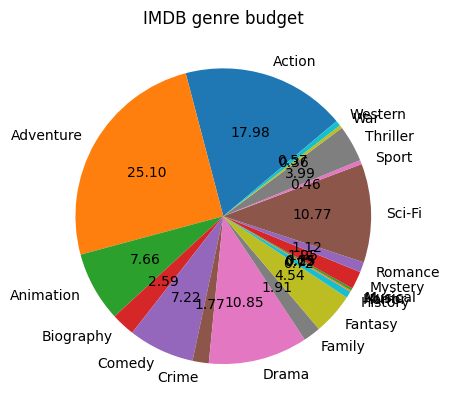

In [11]:
data = pd.read_sql_query("select Budget,genre from IMDB join genre using(Movie_id)",db)
data["genre"].replace("",np.nan,inplace=True)
data["Budget"].replace("",0.0,inplace=True)
data.dropna(inplace=True)

result = data.groupby("genre")["Budget"].sum()

for i in range(len(result)):
    perc_val = (result.values[i]/sum(result.values))*100
    print(result.index[i],format(perc_val,".2f"))

plt.pie(result,labels=result.index,autopct="%.2f",startangle=40)
plt.title("IMDB genre budget")
plt.show()

**Problem 7 :IMDB genre earning**  

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.

Note: Movies has multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.

In [ ]:
import pandas as pd 
import sqlite3 as s 
import numpy as np 
import matplotlib.pyplot as plt
db = s.connect("IMDB.sqlite")


Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


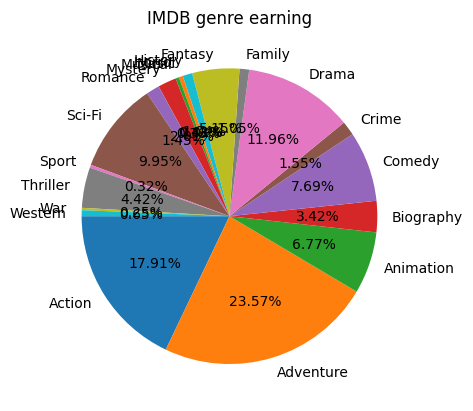

In [24]:
data = pd.read_sql_query("select Domestic,Worldwide, genre from genre join earning using(Movie_id)",db)
data["genre"].replace("",np.nan,inplace= True)
data.dropna(subset=["genre"], inplace=True )
data["Total"] = data.Domestic + data.Worldwide

result = data.groupby('genre')["Total"].sum()

for i in range(len(result)):
    perc_val = (result.values[i]/sum(result.values))*100
    print(result.index[i],format(perc_val,".2f"))

plt.pie(result,labels=result.index,autopct="%.2f%%",startangle=180)
plt.title("IMDB genre earning")
plt.show()


**Problem 8 : IMDB Specific Genre** 

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.
Print the movie name.
Movies has multiple genre.

In [50]:

import pandas as pd 
import sqlite3 as s 
db = s.connect("IMDB.sqlite")
### order of table metters during the join which table comes first from that table data will get compare
data = pd.read_sql_query("select genre, rating , title from IMDB join genre using (Movie_id)",db)

In [51]:
# data = data[(data.genre == "Sci-Fi") and (data.Rating >=8) | (data.genre == "Mystery") and (data.Rating >= 8)]
data = data[((data["genre"]=='Sci-Fi') & (data["Rating"]>=8)) | ((data["genre"]=='Mystery') & (data["Rating"]>=8))]
print(data['Title'].values[0] )

Arrival (2016)
